### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [26]:
import tensorflow as tf

#### Collect Fashion mnist data from tf.keras.datasets 

In [27]:
# Load/Prep the Data
from keras.datasets import cifar10, mnist
(x_train, y_train_num), (x_test, y_test_num) = mnist.load_data()

#### Change train and test labels into one-hot vectors

In [28]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train_num, 10)
y_test = np_utils.to_categorical(y_test_num, 10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [29]:
x_train = x_train.reshape(60000, 784)    # 784 = 28 X 28 the size of each image. There are 60000 images for training
x_test = x_test.reshape(10000, 784)      # Images are flattended out into a vector of 784 elements
x_train = x_train.astype('float32')      # Change the data type to float from integer (0 - 255)
x_test = x_test.astype('float32')
x_train /= 255                           # Scale the data between 0 and 1
x_test /= 255
print ('Train size:', x_train.shape)
print ('Test size:', x_test.shape)

Train size: (60000, 784)
Test size: (10000, 784)


In [30]:
from keras.models import Sequential
model = Sequential()

#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [31]:
from keras.layers import Dense, Dropout
model.add(Dense(200, activation='relu', input_shape=(784,)))   
model.add(Dense(100, activation='relu'))                       
model.add(Dropout(rate=0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [32]:
from keras.optimizers import RMSprop
model.add(Dense(10, activation='softmax'))            
print (model.summary())
batch_size = 128    # keep in 2^x 
epochs = 10
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) 
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.3358 - acc: 0.9022 - val_loss: 0.1470 - val_acc: 0.9563
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - lo

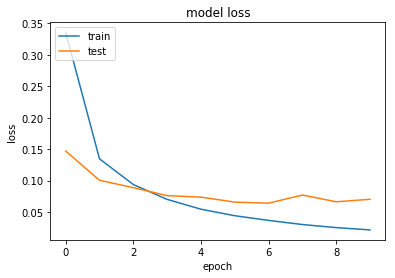

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')